# Hypothesis Testing with Men's and Women's Soccer Matches using R

![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

Perform an appropriate hypothesis test to determine the p-value, and hence result, of whether to reject or fail to reject the null hypothesis that the mean number of goals scored in women's international soccer matches is the same as men's. 

Use a 10% significance level.

For this analysis, you'll use Official FIFA World Cup matches since 2002-01-01, and you'll also assume that each match is fully independent, i.e., team form is ignored.

The p-value and the result of the test must be stored in a data frame called *result_df defined using:

*result_df <- data.frame(p_val, result)*

where p_val is the p-value and result is either the string "fail to reject" or "reject", depending on the result of the test.

In [12]:
# Install and load the packages
install.packages("tidyverse")
library(tidyverse)

Installing tidyverse [2.0.0] ...
	OK [linked cache]


In [13]:
# Load the two datasets
men <- read_csv("men_results.csv")
women <- read_csv("women_results.csv")

# View the data
men

New names:
• `` -> `...1`
Rows: 44353 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): home_team, away_team, tournament
dbl  (3): ...1, home_score, away_score
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 4884 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): home_team, away_team, tournament
dbl  (3): ...1, home_score, away_score
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,date,home_team,away_team,home_score,away_score,tournament
<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<chr>
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly
5,1876-03-25,Scotland,Wales,4,0,Friendly
6,1877-03-03,England,Scotland,1,3,Friendly
7,1877-03-05,Wales,Scotland,0,2,Friendly
8,1878-03-02,Scotland,England,7,2,Friendly


In [14]:
# View the data
women

...1,date,home_team,away_team,home_score,away_score,tournament
<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<chr>
0,1969-11-01,Italy,France,1,0,Euro
1,1969-11-01,Denmark,England,4,3,Euro
2,1969-11-02,England,France,2,0,Euro
3,1969-11-02,Italy,Denmark,3,1,Euro
4,1975-08-25,Thailand,Australia,3,2,AFC Championship
5,1975-08-25,Hong Kong,New Zealand,0,2,AFC Championship
6,1975-08-27,Thailand,Singapore,3,0,AFC Championship
7,1975-08-27,New Zealand,Malaysia,3,0,AFC Championship
8,1975-08-29,Australia,Singapore,3,0,AFC Championship


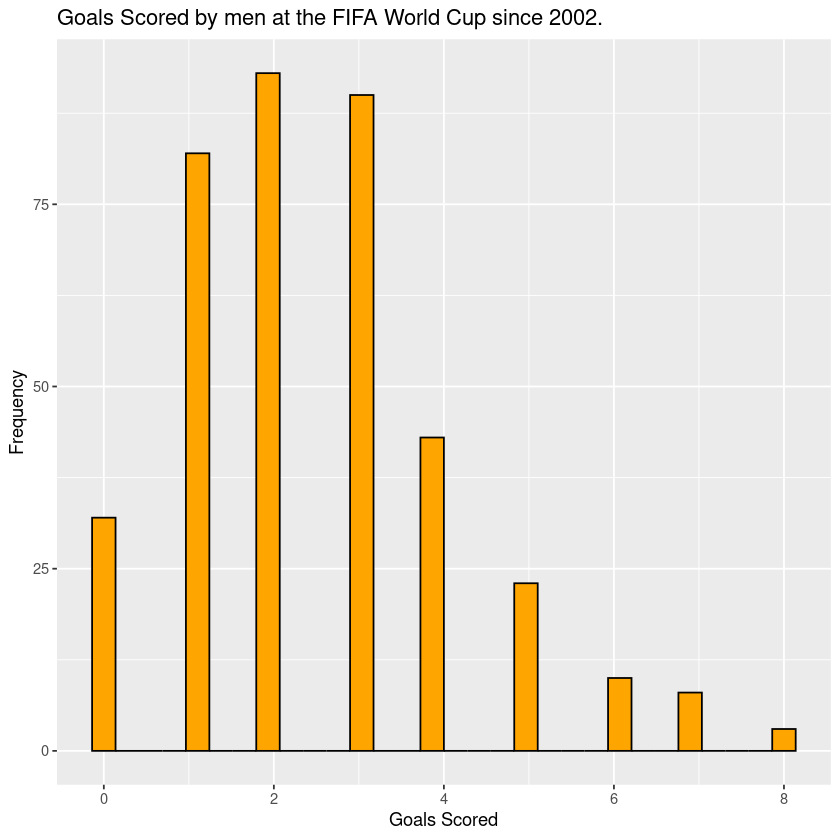

In [15]:
# Filter the two datasets so we only have official FIFA World Cup matches since 2002-01-01. And, create a new column called goals_scored, which is the sum of goals scored at home and goals scored away.
men <- men %>%
          filter(tournament == "FIFA World Cup", date > "2002-01-01") %>%
          mutate(goals_scored = home_score + away_score)

women <- women %>%
          filter(tournament == "FIFA World Cup", date > "2002-01-01") %>%
          mutate(goals_scored = home_score + away_score)

# Plot histograms of the data to visualise whether the data have a normal distributiuon or not
ggplot(men, aes(x = goals_scored)) +
  geom_histogram(color = "black", , fill="orange", bins = 30) +
  ggtitle("Goals Scored by men at the FIFA World Cup since 2002.") +
  xlab("Goals Scored") +
  ylab("Frequency")

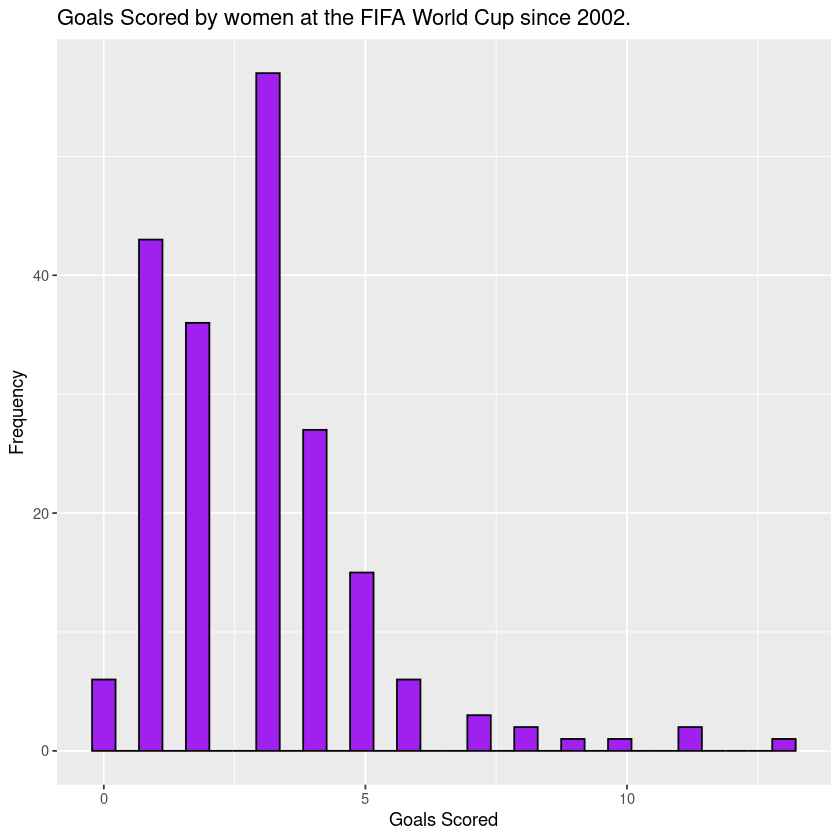

In [16]:
ggplot(women, aes(x = goals_scored)) +
  geom_histogram(color = "black", , fill="purple", bins = 30) +
  ggtitle("Goals Scored by women at the FIFA World Cup since 2002.") +
  xlab("Goals Scored") +
  ylab("Frequency")

In [17]:
# NOTE: Could also use grid.arrange() from the gridExtra package to see ggplot2 plots side-by-side 
# e.g.:
# install.packages("gridExtra") 
# library(gridExtra)
# men_plot <- ggplot(men, aes(x = goals_scored)) +
# 	geom_histogram(color = "red", bins = 30) +
# 	ggtitle("Goals Scored (Men's)") +
# 	xlab("Goals Scored") +
# 	ylab("Frequency")
# women_plot <- ggplot(women, aes(x = goals_scored)) +
# 	geom_histogram(color = "blue", bins = 30) +
# 	ggtitle("Goals Scored (Women's)") +
# 	xlab("Goals Scored") +
# 	ylab("Frequency")
# grid.arrange(men_plot, women_plot, nrow = 1) 

The plots indicate that the data do not have a normal distribution. Therefore, we must use a nonparametric hypothesis test.

Remember the null and alternative hypotheses are:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [20]:
# Run a Wilcoxon-Mann-Whitney test to determine whether goals_scored by women is greater than by men.
test_results <- wilcox.test(
  x = women$goals_scored,
  y = men$goals_scored,
  alternative = "greater"
)

# Determine the Wilcoxon-Mann-Whitney test result using a 10% significance level
p_val <- round(test_results$p.value, 4)
p_val

[1] 0.0051

In [22]:
result <- ifelse(p_val <= 0.10, "Statistically significant (P<0.10): reject null hypothesis", "Fail to reject null hypothesis")

# Create the new result_df dataframe
result_df <- data.frame(p_val, result)

# View the result
result_df

p_val,result
<dbl>,<chr>
0.0051,Statistically significant (P<0.10): reject null hypothesis


The hypothesis test is statistically significant at the 10% level, so we reject the null hypothesis and conclude that the number of goals scored by women is NOT the same as men.